In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/capstone/IBM_quarterly_financials.csv')

In [ ]:
df

,name,ttm,06/30/2021,03/31/2021,12/31/2020,09/30/2020,06/30/2020,03/31/2020,12/31/2019,09/30/2019,06/30/2019,03/31/2019,12/31/2018,09/30/2018,06/30/2018,03/31/2018,12/31/2017,09/30/2017,06/30/2017,03/31/2017,12/31/2016,09/30/2016,06/30/2016,03/31/2016,12/31/2015,09/30/2015,06/30/2015,03/31/2015,12/31/2014,09/30/2014,06/30/2014,03/31/2014,12/31/2013,09/30/2013,06/30/2013,03/31/2013,12/31/2012,09/30/2012,06/30/2012,03/31/2012,...,06/30/1995,03/31/1995,12/31/1994,09/30/1994,06/30/1994,03/31/1994,12/31/1993,09/30/1993,06/30/1993,03/31/1993,12/31/1992,09/30/1992,06/30/1992,03/31/1992,12/31/1991,09/30/1991,06/30/1991,03/31/1991,12/31/1990,09/30/1990,06/30/1990,03/31/1990,12/31/1989,09/30/1989,06/30/1989,03/31/1989,12/31/1988,09/30/1988,06/30/1988,03/31/1988,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,74402000000.00,18745000000.00,17729000000.00,20368000000.00,17561000000.00,18123000000.00,17570000000.00,21777000000.00,18027000000.00,19161000000.00,18181000000.00,21760000000.00,18755000000.00,20003000000.00,19071000000.00,22543000000.00,19153000000.00,19289000000.00,18155000000.00,21771000000.00,19227000000.00,20239000000.00,18684000000.00,22060000000.00,19280000000.00,20813000000.00,19590000000.00,24113000000.00,22397000000.00,24363000000.00,22483000000.00,27699000000.00,23721000000.00,24924000000.00,23408000000.00,29304000000.00,24747000000.00,25783000000.00,24673000000.00,...,1.753100e+10,1.573500e+10,19896000000.00,1.543100e+10,1.535100e+10,1.337300e+10,1.939600e+10,14743000000.00,15519000000.00,13058000000.00,19560000000.00,14702000000.00,1.622400e+10,1.403700e+10,22082000000.00,1.443300e+10,1.473200e+10,1.354500e+10,2.306100e+10,1.527700e+10,1.649500e+10,1.418500e+10,20462000000.00,1.430500e+10,1.521300e+10,1.273000e+10,20937000000.00,1.396000e+10,1.359900e+10,1.174900e+10,18011000000.00,1.272700e+10,8.510000e+09,6.500000e+09,16945000000.00,1.191000e+10,1.226800e+10,1.012700e+10,17155000000.00,1.169800e+10
1,\tOperatingRevenue,74402000000.00,18745000000.00,17729000000.00,20368000000.00,17561000000.00,18123000000.00,17570000000.00,21777000000.00,18027000000.00,19161000000.00,18181000000.00,21760000000.00,18755000000.00,20003000000.00,19071000000.00,22543000000.00,19153000000.00,19289000000.00,18155000000.00,21771000000.00,19227000000.00,20239000000.00,18684000000.00,22060000000.00,19280000000.00,20813000000.00,19590000000.00,24113000000.00,22397000000.00,24363000000.00,22483000000.00,27699000000.00,23721000000.00,24924000000.00,23408000000.00,29304000000.00,24747000000.00,25783000000.00,24673000000.00,...,1.753100e+10,1.573500e+10,19896000000.00,1.543100e+10,1.535100e+10,1.337300e+10,1.939600e+10,14743000000.00,15519000000.00,13058000000.00,19560000000.00,14702000000.00,1.622400e+10,1.403700e+10,22082000000.00,1.443300e+10,1.473200e+10,1.354500e+10,2.306100e+10,1.527700e+10,1.649500e+10,1.418500e+10,20462000000.00,1.430500e+10,1.521300e+10,1.273000e+10,20937000000.00,1.396000e+10,1.359900e+10,1.174900e+10,18011000000.00,1.272700e+10,8.510000e+09,6.500000e+09,16945000000.00,1.191000e+10,1.226800e+10,1.012700e+10,17155000000.00,1.169800e+10
2,CostOfRevenue,38241000000.00,9741000000.00,9525000000.00,9844000000.00,9130000000.00,9423000000.00,9649000000.00,10677000000.00,9692000000.00,10151000000.00,10139000000.00,11073000000.00,9953000000.00,10804000000.00,10825000000.00,11681000000.00,10353000000.00,10495000000.00,10383000000.00,10877000000.00,10213000000.00,10536000000.00,9999000000.00,10652000000.00,9844000000.00,10423000000.00,10138000000.00,11251000000.00,11523000000.00,12389000000.00,11941000000.00,13383000000.00,12341000000.00,12792000000.00,12730000000.00,14137000000.00,13016000000.00,13502000000.00,13555000000.00,...,9.900000e+09,9.071000e+09,11810000000.00,9.277000e+09,9.247000e+09,8.433000e+09,1.095000e+10,7928000000.00,8472000000.00,6508000000.00,10452000000.00,5560000000.00,7.060000e+09,5.739000e+09,10078000000.00,6.152000e+09,6.014000e+09,

In [ ]:
df = df.T

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tSalariesAndWages,\t\t\tOtherGandA,\t\tSellingAndMarketingExpense,\tResearchAndDevelopment,\tDepreciationAmortizationDepletionIncomeState...,\t\tDepreciationAndAmortizationInIncomeStatement,\t\t\tAmortization,\t\t\t\tAmortizationOfIntangiblesIncomeStatement,\tProvisionForDoubtfulAccounts,\tOtherOperatingExpenses,OperatingIncome,NetNonOperatingInterestIncomeExpense,\tInterestIncomeNonOperating,\tInterestExpenseNonOperating,OtherIncomeExpense,\tGainOnSaleOfSecurity,\tSpecialIncomeCharges,\t\tRestructuringAndMergernAcquisition,\t\tWriteOff,\t\tOtherSpecialCharges,\t\tGainOnSaleOfPPE,\tOtherNonOperatingIncomeExpenses,PretaxIncome,TaxProvision,NetIncomeCommonStockholders,\tNetIncome,\t\tNetIncomeIncludingNoncontrollingInterests,\t\t\tNetIncomeContinuousOperations,\t\t\tNetIncomeDiscontinuousOperations,\t\t\tNetIncomeExtraordinary,\t\t\tNetIncomeFromTaxLossCarryforward,\tPreferredStockDividends,AverageDilutionEarnings,DilutedNIAvailtoComStockholders,BasicEPS,DilutedEPS,BasicAverageShares,DilutedAverageShares,TotalExpenses,NetIncomeFromContinuingAndDiscontinuedOperation,NormalizedIncome,InterestIncome,InterestExpense,NetInterestIncome,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInt...,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,74402000000.00,74402000000.00,38241000000.00,36161000000.00,28102000000.00,21365000000.00,19864000000.00,2887000000.00,16977000000.00,1501000000.00,6412000000.00,1113000000.00,1113000000.00,1113000000.00,1113000000.00,NaN,(788000000.00),8059000000.00,(1145000000.00),56000000.00,1201000000.00,(1339000000.00),(161000000.00),NaN,NaN,NaN,NaN,NaN,(1069000000.00),5572000000.00,330000000.00,5334000000.00,5334000000.00,5334000000.00,5244000000.00,90000000.00,NaN,NaN,NaN,NaN,5332000000.00,NaN,NaN,NaN,NaN,66343000000.00,5334000000.00,5498009332.38,56000000.00,1201000000.00,(1145000000.00),6773000000.00,13507000000.00,32620000000.00,6734000000.00,5244000000.00,(270000000.00),(270000000.00),13777000000.00,0.06,(15990667.62)
06/30/2021,18745000000.00,18745000000.00,9741000000.00,9004000000.00,6857000000.00,5097000000.00,4698000000.00,247000000.00,4451000000.00,399000000.00,1657000000.00,281000000.00,281000000.00,281000000.00,281000000.00,NaN,(178000000.00),2147000000.00,(270000000.00),11000000.00,281000000.00,(326000000.00),(65000000.00),NaN,NaN,NaN,NaN,NaN,(261000000.00),1552000000.00,227000000.00,1325000000.00,1325000000.00,1325000000.00,1325000000.00,0.00,NaN,NaN,NaN,NaN,1325000000.00,1.48,1.47,895000000.00,904200000.00,16598000000.00,1325000000.00,1380445000.00,11000000.00,281000000.00,(270000000.00),1833000000.00,NaN,8342000000.00,1680000000.00,1325000000.00,(65000000.00),(65000000.00),3578000000.00,0.15,(9555000.00)
03/31/2021,17729000000.00,17729000000.00,9525000000.00,8204000000.00,6658000000.00,4927000000.00,4575000000.00,269000000.00,4306000000.00,352000000.00,1630000000.00,277000000.00,277000000.00,277000000.00,277000000.00,NaN,(176000000.00),1546000000.00,(266000000.00),14000000.00,280000000.00,(375000000.00),(45000000.00),NaN,NaN,NaN,NaN,NaN,(330000000.00),905000000.00,(51000000.00),955000000.00,955000000.00,955000000.00,956000000.00,(1000000.00),NaN,NaN,NaN,0.00,955000000.00,1.07,1.06,893600000.00,901700000.00,16183000000.00,955000000.00,983000000.00,14000000.00,280000000.00,(266000000.00),1185000000.00,NaN,8130000000.00,1672000000.00,956000000.00,(45000000.00),(45000000.00),2902000000.00,0.40,(18000000.00)
12/31/2020,20368000000.00,20368000000.00,9844000000.00,10523000000.00,8563000000.00,6970000000.00,6580000000.00,2224000000.00,4356000000.00,390000000.00,161

In [ ]:
df = df.drop('ttm')
df = df.drop('name')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
06/30/2021,18745000000.00,18745000000.00,9741000000.00,9004000000.00,6857000000.00,5097000000.00,4698000000.00,247000000.00,4451000000.00,399000000.00,1657000000.00,281000000.00,281000000.00,281000000.00,281000000.00,NaN,(178000000.00),2147000000.00,(270000000.00),11000000.00,281000000.00,(326000000.00),(65000000.00),NaN,NaN,NaN,NaN,NaN,(261000000.00),1552000000.00,227000000.00,1325000000.00,1325000000.00,1325000000.00,1325000000.00,0.00,NaN,NaN,NaN,NaN,1325000000.00,1.48,1.47,895000000.00,904200000.00,16598000000.00,1325000000.00,1380445000.00,11000000.00,281000000.00,(270000000.00),1833000000.00,NaN,8342000000.00,1680000000.00,1325000000.00,(65000000.00),(65000000.00),3578000000.00,0.15,(9555000.00)
03/31/2021,17729000000.00,17729000000.00,9525000000.00,8204000000.00,6658000000.00,4927000000.00,4575000000.00,269000000.00,4306000000.00,352000000.00,1630000000.00,277000000.00,277000000.00,277000000.00,277000000.00,NaN,(176000000.00),1546000000.00,(266000000.00),14000000.00,280000000.00,(375000000.00),(45000000.00),NaN,NaN,NaN,NaN,NaN,(330000000.00),905000000.00,(51000000.00),955000000.00,955000000.00,955000000.00,956000000.00,(1000000.00),NaN,NaN,NaN,0.00,955000000.00,1.07,1.06,893600000.00,901700000.00,16183000000.00,955000000.00,983000000.00,14000000.00,280000000.00,(266000000.00),1185000000.00,NaN,8130000000.00,1672000000.00,956000000.00,(45000000.00),(45000000.00),2902000000.00,0.40,(18000000.00)
12/31/2020,20368000000.00,20368000000.00,9844000000.00,10523000000.00,8563000000.00,6970000000.00,6580000000.00,2224000000.00,4356000000.00,390000000.00,1611000000.00,277000000.00,277000000.00,277000000.00,277000000.00,NaN,(295000000.00),1960000000.00,(302000000.00),15000000.00,317000000.00,(370000000.00),(49000000.00),NaN,NaN,NaN,NaN,NaN,(212000000.00),1289000000.00,24000000.00,1355000000.00,1355000000.00,1355000000.00,1264000000.00,91000000.00,NaN,NaN,NaN,0.00,1355000000.00,1.52,1.51,892600000.00,899000000.00,18407000000.00,1355000000.00,1419058184.64,15000000.00,317000000.00,(302000000.00),1606000000.00,NaN,8422000000.00,1699000000.00,1264000000.00,(158000000.00),(158000000.00),3463000000.00,0.02,(2941815.36)
09/30/2020,17561000000.00,17561000000.00,9130000000.00,8430000000.00,6027000000.00,4372000000.00,4011000000.00,147000000.00,3864000000.00,361000000.00,1515000000.00,278000000.00,278000000.00,278000000.00,278000000.00,NaN,(138000000.00),2403000000.00,(308000000.00),15000000.00,323000000.00,(268000000.00),(2000000.00),NaN,NaN,NaN,NaN,NaN,(266000000.00),1827000000.00,128000000.00,1697000000.00,1697000000.00,1697000000.00,1698000000.00,(1000000.00),NaN,NaN,NaN,0.00,1697000000.00,1.90,1.89,891400000.00,897300000.00,15157000000.00,1697000000.00,1699860000.00,15000000.00,323000000.00,(308000000.00),2150000000.00,NaN,7725000000.00,1683000000.00,1698000000.00,(2000000.00),(2000000.00),3835000000.00,0.07,(140000.00)
06/30/2020,18123000000.00,18123000000.00,9423000000.00,8700000000.00,6627000000.00,4894000000.00,4531000000.00,292000000.00,4239000000.00,363000000.00,1582000000.00,284000000.00,284000000.00,284000000.00,284000000.00,NaN,(133000000.00),2073000000.00,(300000000.00),23000000.00,323000000.00,(200000000.00),30000000.00,NaN,NaN,NaN,NaN,NaN,(230000000.00),1571000000.00,209000000.00,1361000000.00,1361000000.00,1361000000.00,1362000000.00,(1000000.00),NaN,NaN,NaN,0.00,1361000000.00,1.53,1.52,889400000.00,894900000.00,16050000000.00,1361000000.00,1335990000.00,23000000.00,323000000.00,(300000000.00),1894000000.00,NaN,8028000000.00,1679000000.00,1362000000.00,30000000.00,30000000.00,3543000000.00,0.13,3990000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/3

In [ ]:
df_RD = df.iloc[:,10]
df_RD = df_RD.dropna()

In [ ]:
data = {'Date':df_RD.index,
        'R&D':df_RD.values}
df_RD = pd.DataFrame(data)

In [ ]:
df_RD

,Date,R&D
0,06/30/2021,1657000000.00
1,03/31/2021,1630000000.00
2,12/31/2020,1611000000.00
3,09/30/2020,1515000000.00
4,06/30/2020,1582000000.00
...,...,...
104,06/30/1995,9.74e+08
105,03/31/1995,9.13e+08
106,12/31/1994,1118000000.00
107,09/30/1994,1.053e+09


In [ ]:
df_RD['Date'] = pd.to_datetime(df_RD['Date'])
df_RD = df_RD.sort_index(axis=0, ascending=False)
df_RD

,Date,R&D
108,1994-06-30,1.091e+09
107,1994-09-30,1.053e+09
106,1994-12-31,1118000000.00
105,1995-03-31,9.13e+08
104,1995-06-30,9.74e+08
...,...,...
4,2020-06-30,1582000000.00
3,2020-09-30,1515000000.00
2,2020-12-31,1611000000.00
1,2021-03-31,1630000000.00


In [ ]:
df_IBM_stockprice = pd.read_csv('drive/My Drive/capstone/IBM.csv')

In [ ]:
df_IBM_stockprice = df_IBM_stockprice[['Date','Close']]
df_IBM_stockprice = df_IBM_stockprice.rename({'Close': 'stockprice'}, axis=1)
df_IBM_stockprice['Date'] = pd.to_datetime(df_IBM_stockprice['Date'])
df_IBM_stockprice

,Date,stockprice
0,1994-06-30,14.041587
1,1994-07-01,13.623327
2,1994-07-05,13.444073
3,1994-07-06,13.623327
4,1994-07-07,13.563576
...,...,...
6886,2021-11-03,121.539200
6887,2021-11-04,120.849998
6888,2021-11-05,123.610001
6889,2021-11-08,124.540001


In [ ]:
df_Nasdaq = pd.read_csv('drive/My Drive/capstone/nasdaq.csv')

In [ ]:
df_Nasdaq = df_Nasdaq.dropna()
df_Nasdaq = df_Nasdaq[['Date', 'Close']]
df_Nasdaq['Date'] = pd.to_datetime(df_Nasdaq['Date'])
df_Nasdaq =df_Nasdaq.rename({'Close': 'Nasdaq_value'}, axis=1)
df_Nasdaq

,Date,Nasdaq_value
0,1971-02-05,100.000000
1,1971-02-08,100.839996
2,1971-02-09,100.760002
3,1971-02-10,100.690002
4,1971-02-11,101.449997
...,...,...
12799,2021-11-03,15811.580078
12800,2021-11-04,15940.309570
12801,2021-11-05,15971.589844
12802,2021-11-08,15982.360352


In [ ]:
df_1 = pd.merge(df_RD, df_Nasdaq, how="outer", on=['Date'])
df_1

,Date,R&D,Nasdaq_value
0,1994-06-30,1.091e+09,705.960022
1,1994-09-30,1.053e+09,764.289978
2,1994-12-31,1118000000.00,NaN
3,1995-03-31,9.13e+08,817.210022
4,1995-06-30,9.74e+08,933.450012
...,...,...,...
12831,2021-11-03,NaN,15811.580078
12832,2021-11-04,NaN,15940.309570
12833,2021-11-05,NaN,15971.589844
12834,2021-11-08,NaN,15982.360352


In [ ]:
df_2 = pd.merge(df_1, df_IBM_stockprice, how="outer", on=['Date'])
df_2

,Date,R&D,Nasdaq_value,stockprice
0,1994-06-30,1.091e+09,705.960022,14.041587
1,1994-09-30,1.053e+09,764.289978,16.640774
2,1994-12-31,1118000000.00,NaN,NaN
3,1995-03-31,9.13e+08,817.210022,19.628345
4,1995-06-30,9.74e+08,933.450012,22.944551
...,...,...,...,...
12831,2021-11-03,NaN,15811.580078,121.539200
12832,2021-11-04,NaN,15940.309570,120.849998
12833,2021-11-05,NaN,15971.589844,123.610001
12834,2021-11-08,NaN,15982.360352,124.540001


In [ ]:
df_IBM = df_2.dropna()

In [ ]:
df_IBM['R&D'] = pd.to_numeric(df_IBM['R&D'], downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_IBM

,Date,R&D,Nasdaq_value,stockprice
0,1994-06-30,1.091000e+09,705.960022,14.041587
1,1994-09-30,1.053000e+09,764.289978,16.640774
3,1995-03-31,9.130000e+08,817.210022,19.628345
4,1995-06-30,9.740000e+08,933.450012,22.944551
9,1996-09-30,1.115000e+09,1226.920044,29.756214
...,...,...,...,...
104,2020-06-30,1.582000e+09,10058.769531,115.458893
105,2020-09-30,1.515000e+09,11167.509766,116.319313
106,2020-12-31,1.611000e+09,12888.280273,120.344170
107,2021-03-31,1.630000e+09,13246.870117,127.399620


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


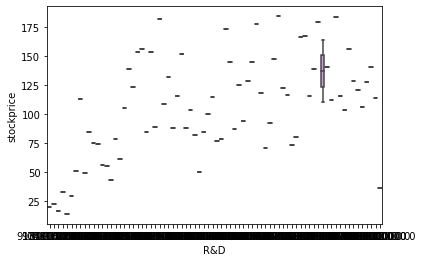

In [ ]:
sns.boxplot(df_IBM['R&D'],df_IBM['stockprice'])

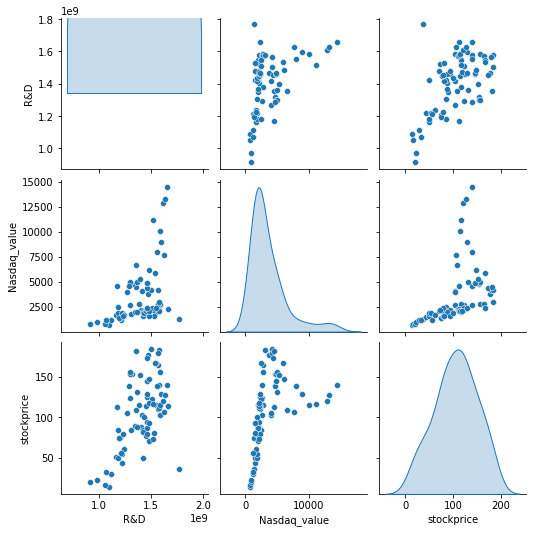

In [ ]:
sns.pairplot(df_IBM, diag_kind='kde')

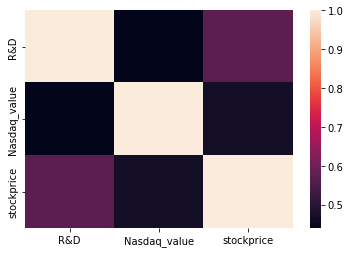

In [ ]:
sns.heatmap(df_IBM.corr())

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:

x = df_IBM.iloc[:,1:3].values
y = df_IBM.iloc[:,3].values

# sc = StandardScaler()
# x = sc.fit_transform(x)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=33, test_size=0.19)

In [ ]:
regressor = DecisionTreeRegressor()

regressor.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
score = regressor.score(xtest,ytest)
print('R-squared:', score)

R-squared: 0.7961758658700628


In [ ]:
ypred = regressor.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = mean_absolute_error(ytest, ypred)
print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  617.1517345123077
RMSE:  17.777406666666664


In [ ]:
ytest

array([110.076485, 118.049713,  32.803535, 128.240921,  92.629066,
        19.628345, 106.051628, 145.105164,  14.041587,  88.133362,
        36.20937 , 179.321228, 155.506699, 177.036331, 167.179733])

In [ ]:
ypred

array([113.317398,  70.936905,  22.944551, 122.60994 ,  50.011951,
        16.640774, 139.024857, 144.789673,  29.756214,  81.969406,
        50.011951, 184.024857, 131.567871, 173.298279, 113.317398])

In [ ]:
import matplotlib.pyplot as plt

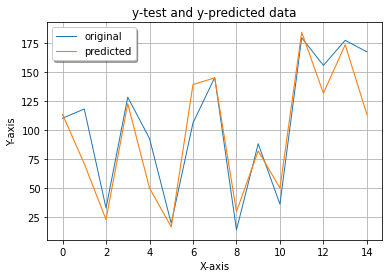

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 